In [ ]:
!pip install pymysql
!pip install pandas

In [1]:
import pymysql
import pandas as pd
conn = pymysql.connect(host='localhost',port=3306,database='outputdb',user='',password='')
cursor = conn.cursor()
sql=pd.read_sql_query('select * from outputdb.Loan limit 5',conn)
print(sql)

/home/rupeshr/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No           0      Graduate            No   
1  LP001003   Male     Yes           1      Graduate            No   
2  LP001005   Male     Yes           0      Graduate           Yes   
3  LP001006   Male     Yes           0  Not Graduate            No   
4  LP001008   Male      No           0      Graduate            No   
5  LP001011   Male     Yes           2      Graduate           Yes   
6  LP001013   Male     Yes           0  Not Graduate            No   
7  LP001018   Male     Yes           2      Graduate            No   
8  LP001020   Male     Yes           1      Graduate            No   
9  LP001024   Male     Yes           2      Graduate            No   

   ApplicantIncome  CoapplicantIncome LoanAmount  Loan_Amount_Term  \
0             5849                  0                          360   
1             4583               1508        128               360   
2             3000 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
data=pd.read_csv("/home/rupeshr/Downloads/Loan.csv")

In [94]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [96]:
data.shape

(614, 13)

In [97]:
#It only predicts the numerical data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [98]:
#To describe categorical columns
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [99]:
#get numerocal columns names
numericalCols = data.select_dtypes(['float64','int64']).columns
numericalCols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [100]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [101]:
#get Categorical columns names
categoricalCols = data.select_dtypes(['object']).columns
categoricalCols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [102]:
#it is used to check the cross-tabulation of two or more factors
pd.crosstab(data['Credit_History'], data['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


/home/rupeshr/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1395: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


'As we can see that ApplicantIncome and CoapplicantIncome columns has large Standard Deviation and more outliers.\nwhile LoanAmount and Loan_Amount_Term columns has less Standard Deviation and less outliers.'

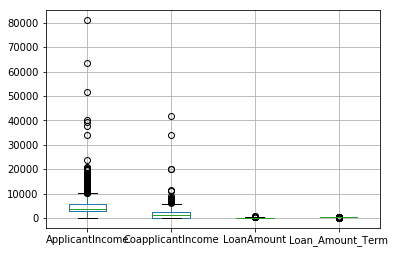

In [103]:
#draw a boxplot to check the outliers
data.boxplot(column=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                     'Loan_Amount_Term'])

'''As we can see that ApplicantIncome and CoapplicantIncome columns has large Standard Deviation and more outliers.
while LoanAmount and Loan_Amount_Term columns has less Standard Deviation and less outliers.'''

'See! Data is left skewed. We have to convert it normal Distribution'

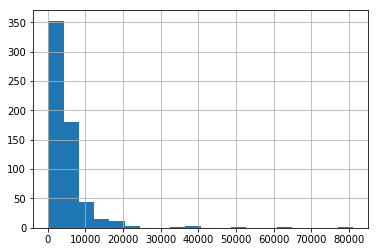

In [104]:
#By using Histogram, lets  check the distribution of Numerical columns one by one.
data['ApplicantIncome'].hist(bins=20)
'''See! Data is left skewed. We have to convert it normal Distribution'''

'Again, data is left skewed'

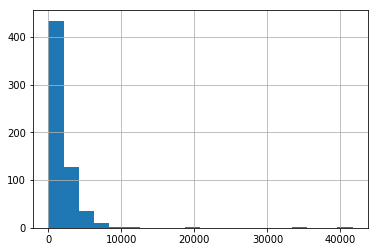

In [105]:
data['CoapplicantIncome'].hist(bins=20)
'''Again, data is left skewed'''

'It looks like normal distributed.'

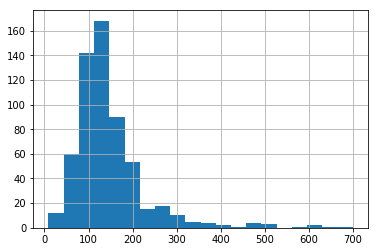

In [106]:
data['LoanAmount'].hist(bins=20)
'''It looks like normal distributed.'''

'Not showing any ditribution, hard to say any thing.'

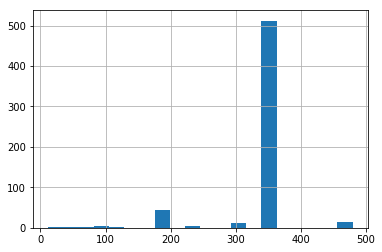

In [107]:
data['Loan_Amount_Term'].hist(bins=20)
'''Not showing any ditribution, hard to say any thing.'''

In [108]:
#Preprocessing of Data

#As, we see there are missing values in our data and some columns needs to normalized.

#handle missing values

In [109]:
#tell how  many entries are missing in each columns
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [110]:
data['Married'].mode()[0]

'Yes'

In [111]:
#for categorical columns use to fillup the values using mode 
data['Gender']= data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']= data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']= data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']= data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [112]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [113]:
data['LoanAmount'].median()

128.0

In [114]:
'''numerical columns has not normally distributed. So, median is better for imputation.'''
#for numerical columns use to fillup the values using median 
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
#Credit_History has only two unique values 0 and 1, it's better to use mode for imputation.
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [115]:
'''See! all the missing values are filled successfully'''
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [116]:
#handle skewed numerical columns

'ApplicantIncome before normalization'

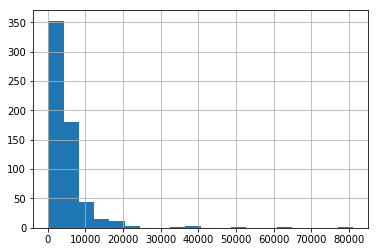

In [117]:
data['ApplicantIncome'].hist(bins=20)
'''ApplicantIncome before normalization'''
#sns.distplot(data['ApplicantIncome'], kde=True, color='darkred', bins=20)

In [118]:
#apply normalization using log
data['ApplicantIncome_log']= np.log(data['ApplicantIncome'])

'ApplicantIncome_log before normalization'

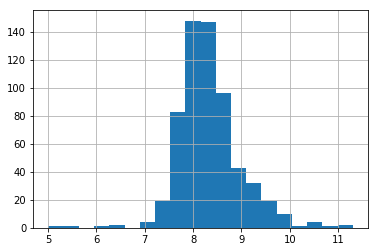

In [119]:
data['ApplicantIncome_log'].hist(bins=20)
'''ApplicantIncome_log before normalization'''

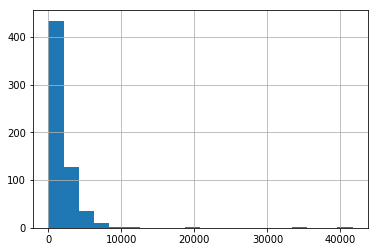

In [120]:
data['CoapplicantIncome'].hist(bins=20)

'totalIncome before normalization'

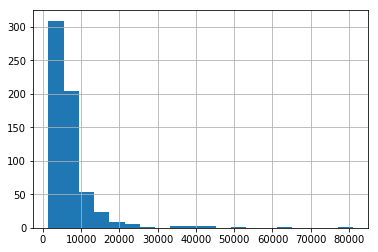

In [121]:
# create a new variable of totalIncome 
data['totalIncome']= data['CoapplicantIncome'] + data['ApplicantIncome']
data['totalIncome'].hist(bins=20)
'''totalIncome before normalization'''

'totalIncome after normalization'

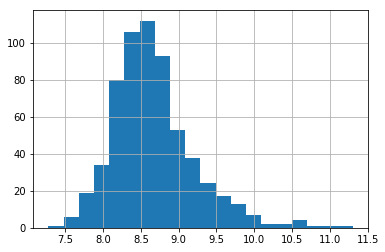

In [122]:
#normalize it
data['totalIncome_log']= np.log(data['totalIncome'])
data['totalIncome_log'].hist(bins=20)
'''totalIncome after normalization'''

'LoanAmount Before Normalization'

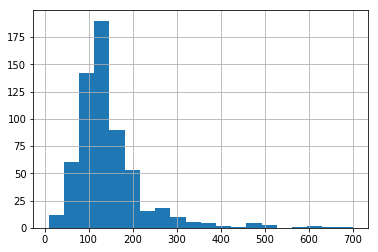

In [123]:
data['LoanAmount'].hist(bins=20)
'''LoanAmount Before Normalization'''

'LoanAmount Before Normalization'

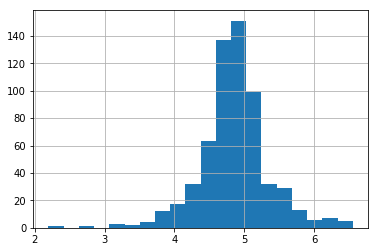

In [124]:
data['LoanAmount_log']= np.log(data['LoanAmount'])

data['LoanAmount_log'].hist(bins=20)
'''LoanAmount Before Normalization'''

'Loan_Amount_Term Before Normalization'

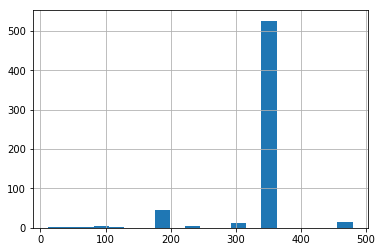

In [125]:
data['Loan_Amount_Term'].hist(bins=20)
'''Loan_Amount_Term Before Normalization'''


'Loan_Amount_Term After Normalization'

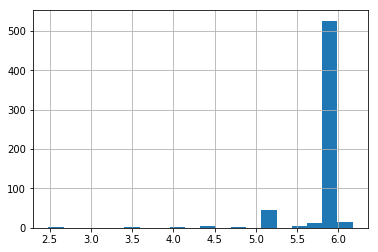

In [126]:
data['Loan_Amount_Term_log']= np.log(data['Loan_Amount_Term'])

data['Loan_Amount_Term_log'].hist(bins=20)
'''Loan_Amount_Term After Normalization'''

In [127]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_log,totalIncome,totalIncome_log,LoanAmount_log,Loan_Amount_Term_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,8.341213,7024.705081,8.669414,4.857250,5.803234
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.645263,6458.663872,0.545102,0.495996,0.312699
min,150.000000,0.000000,9.000000,12.000000,0.000000,5.010635,1442.000000,7.273786,2.197225,2.484907
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,7.964677,4166.000000,8.334712,4.607658,5.886104
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,8.246040,5416.500000,8.597205,4.852030,5.886104
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,8.664750,7521.750000,8.925549,5.104426,5.886104
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,11.302204,81000.000000,11.302204,6.551080,6.173786


In [129]:
X_1=data.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status'], axis=1)

In [130]:
X_1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome_log,totalIncome,totalIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,8.674026,5849.0,8.674026,4.852030,5.886104
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,8.430109,6091.0,8.714568,4.852030,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,8.006368,3000.0,8.006368,4.189655,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,7.856707,4941.0,8.505323,4.787492,5.886104
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,8.699515,6000.0,8.699515,4.948760,5.886104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,1.0,Rural,7.972466,2900.0,7.972466,4.262680,5.886104
610,LP002979,Male,Yes,3+,Graduate,No,1.0,Rural,8.320205,4106.0,8.320205,3.688879,5.192957
611,LP002983,Male,Yes,1,Graduate,No,1.0,Urban,8.996157,8312.0,9.025456,5.533389,5.886104
612,LP002984,Male,Yes,2,Graduate,No,1.0,Urban,8.933664,7583.0,8.933664,5.231109,5.886104


In [131]:
#selection of columns
X=data.iloc[:,np.r_[1:6,10:12,13,15:18]] #independent variables
y=data.iloc[:,12] # dependent variable

In [38]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [134]:
#convert categorical columns values into numerical

# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [45]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

#OrdinalEncoder is for 2D data with the shape (n_samples, n_features)
#LabelEncoder is for 1D data with the shape (n_samples,))

In [135]:
# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_test = X_test.copy()

In [136]:
# Apply Ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_test[object_cols] = ordinal_encoder.transform(X_test[object_cols])

In [137]:
label_X_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome_log,totalIncome_log,LoanAmount_log,Loan_Amount_Term_log
90,1.0,1.0,0.0,0.0,0.0,1.0,1.0,7.992269,8.675564,4.875197,5.886104
533,1.0,0.0,1.0,0.0,0.0,1.0,1.0,9.328123,9.328123,5.278115,5.886104
452,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.280964,8.644883,5.003946,5.886104
355,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.246172,8.246172,4.753590,5.192957
266,1.0,1.0,2.0,0.0,0.0,1.0,1.0,8.457018,8.715224,5.010635,5.886104
...,...,...,...,...,...,...,...,...,...,...,...
277,1.0,1.0,0.0,0.0,0.0,1.0,2.0,8.040125,8.390041,4.382027,5.886104
9,1.0,1.0,1.0,0.0,0.0,1.0,1.0,9.460398,10.077819,5.855072,5.886104
359,1.0,1.0,3.0,0.0,0.0,1.0,1.0,8.550048,9.028099,5.298317,5.886104
192,1.0,1.0,0.0,1.0,0.0,1.0,2.0,8.705000,8.705000,5.075174,5.886104


In [138]:
# Make copy to avoid changing original data 
label_y_train = y_train.copy()
label_y_test = y_test.copy()

In [139]:
#apply encoder on y split variables
label_encoder = LabelEncoder()
label_y_train =  label_encoder.fit_transform(label_y_train)
label_y_test =  label_encoder.fit_transform(label_y_test)

In [140]:
label_y_train 

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [141]:
#logistic model
from sklearn.linear_model import LogisticRegression




In [144]:
logistic_model = LogisticRegression()

In [145]:
logistic_model.fit(label_X_train, label_y_train)

LogisticRegression()

In [146]:
log_pred = logistic_model.predict(label_X_test)

In [147]:
log_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [150]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(log_pred, label_y_test)
cm

array([[14,  2],
       [19, 88]])

In [151]:
label_y_test.shape

(123,)

In [153]:
102/123

0.8292682926829268

In [154]:
21/123

0.17073170731707318

In [149]:
from sklearn import metrics
print("Acuracy of Logistic Regression model is : ", metrics.accuracy_score(log_pred, label_y_test))

Acuracy of Logistic Regression model is :  0.8292682926829268


In [ ]:
#https://booksvooks.com/nonscrolablepdf/introduction-to-machine-learning-with-python-a-guide-for-data-scientists-pdf.html?page=1